In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

sc.settings.verbosity = 3  

In [2]:
fpath = "/scratch/indikar_root/indikar1/cstansbu/hematokytos/pretrained_embeddings/merged_adata.h5ad"

adata = sc.read_h5ad(fpath)
sc.logging.print_memory_usage()
adata

Memory usage: current 0.90 GB, difference +0.90 GB


/home/cstansbu/miniconda3/envs/scanpy/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 171498 × 512
    obs: 'n_genes', 'dataset_x', 'n_genes_by_counts', 'total_counts', 'obs_index', 'cell_type', 'dataset_y', 'standard_cell_type', 'cell_id', 'input_ids', 'length', 'total_length'
    uns: 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

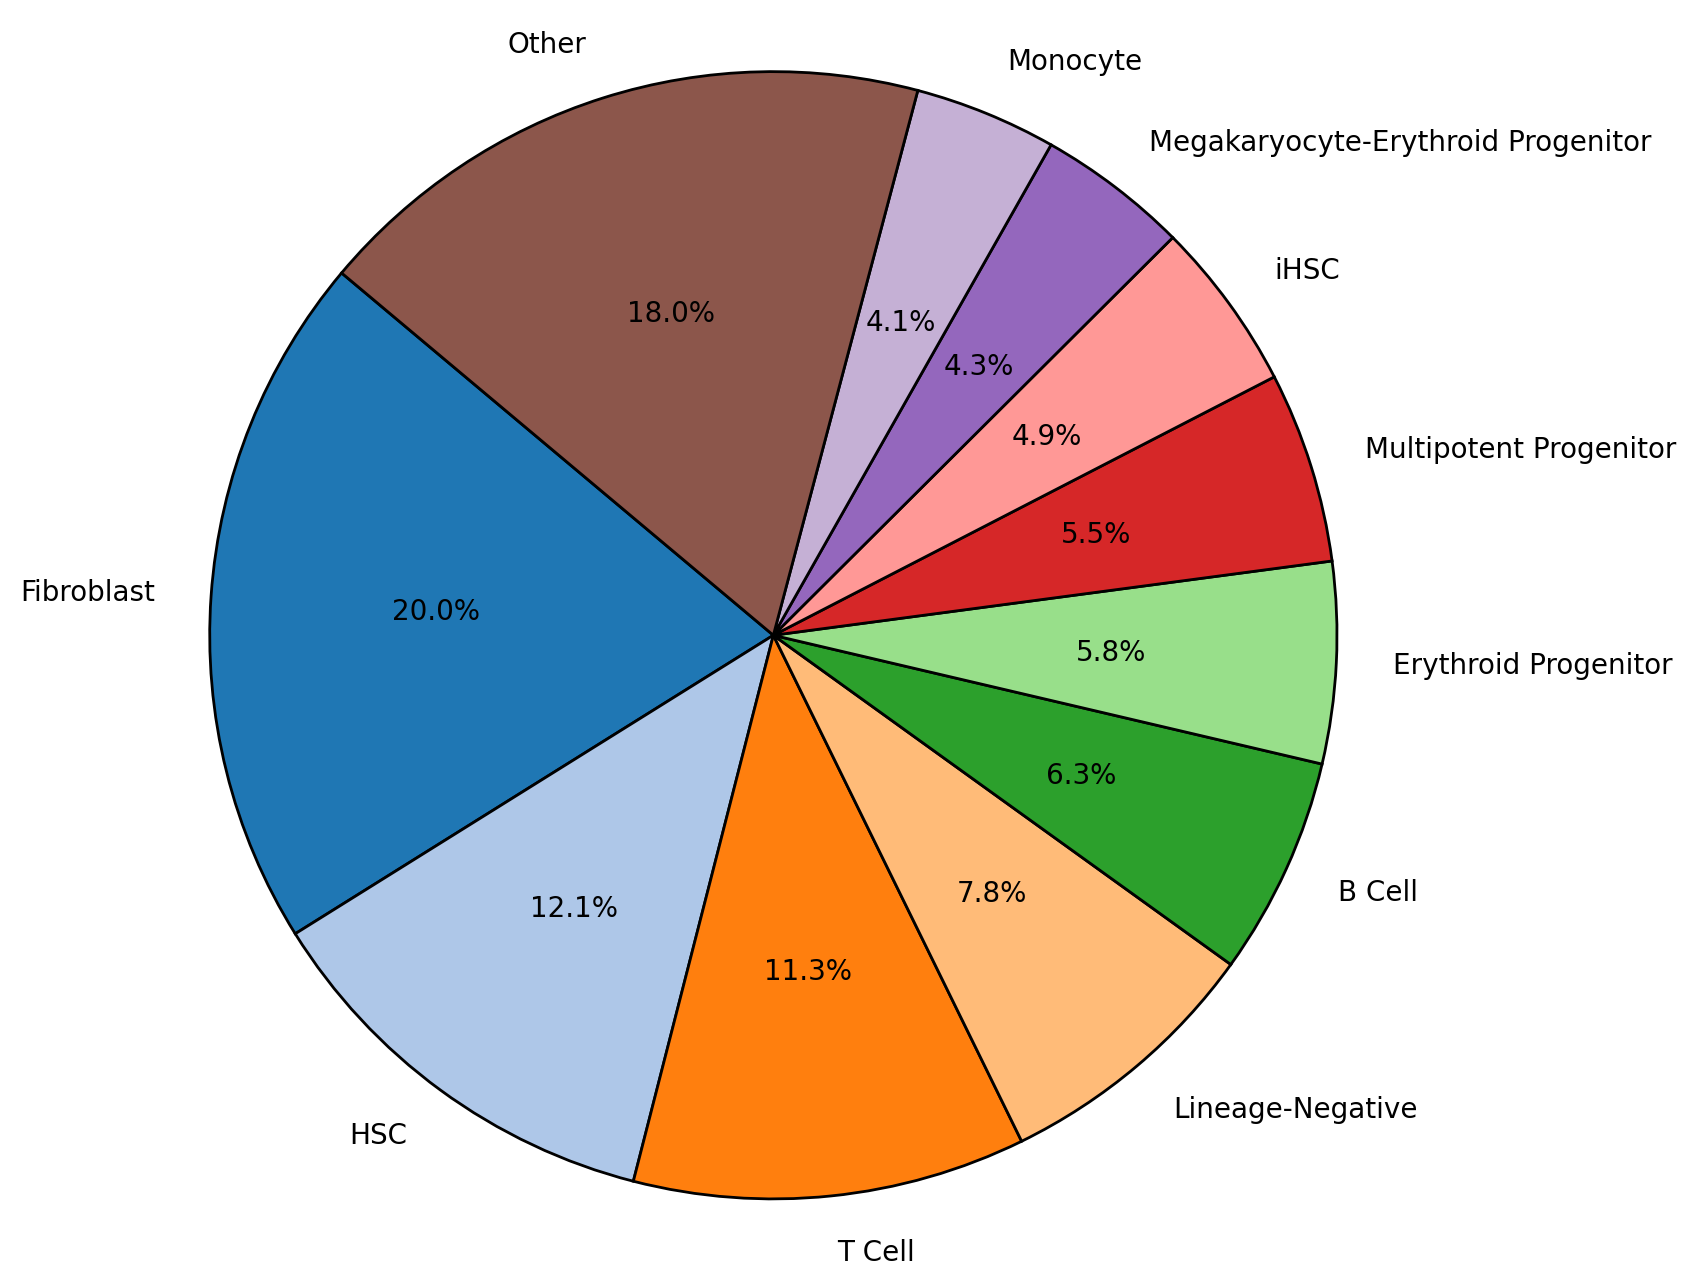

In [3]:
plt.rcParams['figure.dpi'] = 200

cell_type_counts = adata.obs['standard_cell_type'].value_counts()

# Define a threshold to combine smaller categories into 'Others'
threshold = 0.03  # Adjust as needed, this represents 3%

# Combine smaller categories
small_categories = cell_type_counts[cell_type_counts / cell_type_counts.sum() < threshold]
others_count = small_categories.sum()
main_categories = cell_type_counts[cell_type_counts / cell_type_counts.sum() >= threshold]
main_categories['Others'] = others_count

cell_type_mapping = {
    'Fib': 'Fibroblast',
    'HSC': 'HSC',
    'T_cell': 'T Cell',
    'LinNeg': 'Lineage-Negative',
    'B_cell': 'B Cell',
    'EryP': 'Erythroid Progenitor',
    'MPP': 'Multipotent Progenitor',
    'iHSC': 'iHSC',
    'MEP': 'Megakaryocyte-Erythroid Progenitor',
    'Mono': 'Monocyte',
    'Others': 'Other' 
}

main_categories.index = main_categories.index.map(cell_type_mapping)

# Create a pie chart with improved colors and black edges
plt.figure(figsize=(8, 8))
colors = plt.cm.tab20.colors  # Use a colormap for better color choices
plt.pie(main_categories, labels=main_categories.index, autopct='%1.1f%%', startangle=140,
        colors=colors, wedgeprops=dict(edgecolor='black', linewidth=1))
plt.axis('equal')
plt.show()

In [4]:
print(adata.obs['dataset_x'].value_counts().to_latex())

\begin{tabular}{lr}
\toprule
 & count \\
dataset_x &  \\
\midrule
weng_young2_all & 29289 \\
tabula_sapiens & 27313 \\
weng_young1_all_t2 & 25317 \\
pellin & 19180 \\
weng_young1_all_t1 & 18499 \\
weng_old2_BMMC_HSPC & 17292 \\
weng_old1_BMMC_HSPC & 14790 \\
iHSC & 8379 \\
sc_fib & 7736 \\
weng_young2_HSC & 3703 \\
\bottomrule
\end{tabular}



In [5]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)